# Data visualization
- Intro to Data Science
- Karlo Boroš - 0036531517
- Dataset: "Pima Indians diabetes mellitus classification based on machine learning (ML) algorithms"

### Vizualizacija podataka
- Uvod u znanost o podacima
- Karlo Boroš - 0036531517
- Zadani skup podataka: "Pima Indians diabetes mellitus classification based on machine learning (ML) algorithms"

### 0. Učitavanje potrebnih paketa

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Priprema podataka

#### a) Učitavanje skupa i prvi pogled na podatke

In [2]:
data = pd.read_csv("diabetes.csv")

In [3]:
data.shape

(768, 9)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [7]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Iz prethodnih linija koda i njihovih izlaza možemo izvesti nekoliko osnovnih zaključaka:
- dataset se sastoji od 768 primjera i 9 značajki koje razmatramo
- jedino je značajka Outcome binarna što je i logično jer nam govori ima li osoba dijabetes ili ne, dok ostale značajke poprimaju razne vrijednosti
- nemamo nijedan NA podatak što je odlično, ali očito su ti podaci zamijenjeni nulama što nam ne odgovara jer ne smiju biti nula tako da ću te podatke isključiti iz analiza ovisno o potrebi

U sljedećim redovima su objašnjenja pojedinih značajki sa stranice:
- Pregnancies - number of times pregnant
- Glucose - plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure - diastolic blood pressure (mm Hg)
- SkinThickness - triceps skin fold thickness (mm)
- Insulin - 2-Hour serum insulin (mu U/ml)
- BMI - body mass index (weight in kg/(height in m)^2)
- DiabetesPedigree - diabetes pedigree function
- Age - age (years)
- Outcome - class variable (0 or 1) 268 of 768 are 1, the others are 0

Moj cilj je analizirati značajke i probati doći do kvalitetnih zaključaka o predispozicijama za dijabetes. 

#### b) Prilagodba podataka za analizu

In [8]:
data_glucose = data[data.Glucose > 0]
data_blood = data[data.BloodPressure > 0]
data_skin = data[data.SkinThickness > 0]
data_insulin = data[data.Insulin > 0]
data_bmi = data[data.BMI > 0]

#print(min(data_glucose.Glucose))
#print(min(data_blood.BloodPressure))
#print(min(data_skin.SkinThickness))
#print(min(data_insulin.Insulin))
#print(min(data_bmi.BMI))

### 2. Vizualizacija podataka

#### a) Pie chart oboljelih od dijabetesa

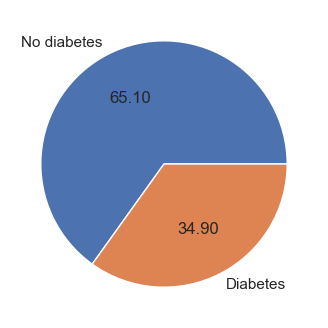

In [40]:
count_sick = data.groupby('Outcome').count().loc[:,'Age'].values
percent = count_sick/len(data)*100
plt.figure(figsize=(6,4))
plt.pie(percent, labels = ("No diabetes", "Diabetes"), autopct = '%.2f')
plt.show()

#### b) Histogrami svih značajki u odnosu na stanje bolesti

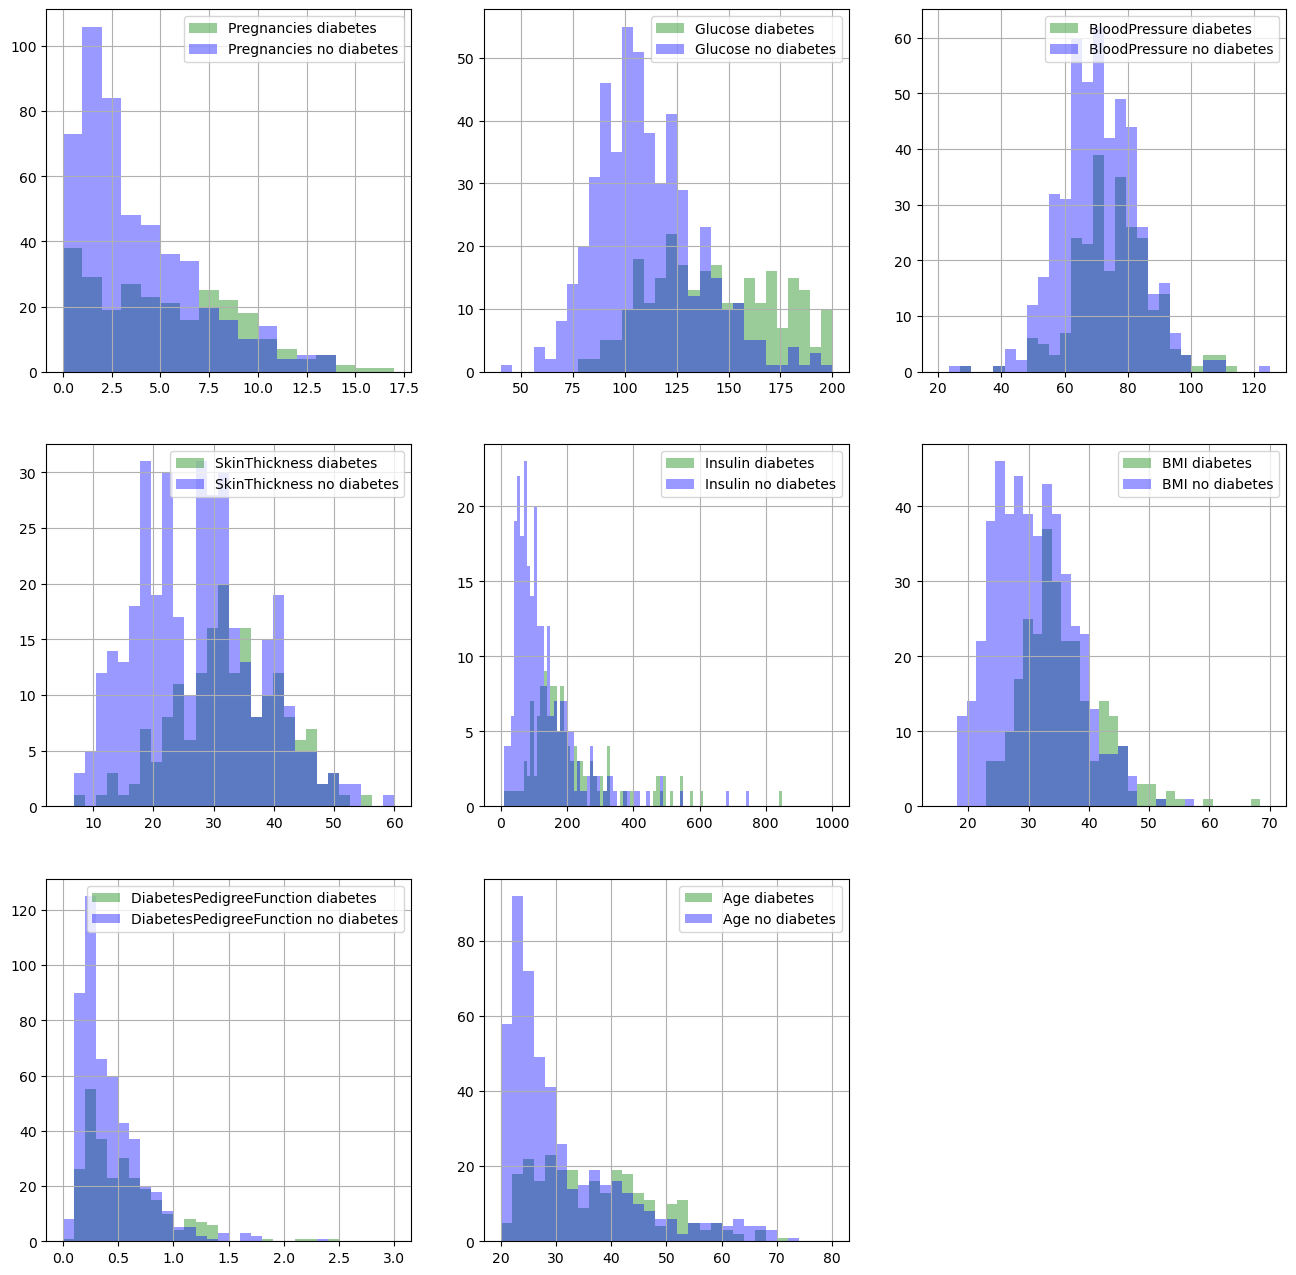

In [15]:
plt.figure(figsize=(16,16))

plt.subplot(3,3,1)
plt.hist(data[data.Outcome == 1].Pregnancies, bins=17, range=(0,17), label='Pregnancies diabetes', color='green', alpha=0.4)
plt.hist(data[data.Outcome == 0].Pregnancies, bins=17, range=(0,17), label='Pregnancies no diabetes', color='blue', alpha=0.4)
plt.legend(loc='best')
plt.grid()

plt.subplot(3,3,2)
plt.hist(data_glucose[data_glucose.Outcome == 1].Glucose, bins=30, range=(40,200), label='Glucose diabetes', color='green', alpha=0.4)
plt.hist(data_glucose[data_glucose.Outcome == 0].Glucose, bins=30, range=(40,200), label='Glucose no diabetes', color='blue', alpha=0.4)
plt.legend(loc='best')
plt.grid()

plt.subplot(3,3,3)
plt.hist(data_blood[data_blood.Outcome == 1].BloodPressure, bins=30, range=(20,125), label='BloodPressure diabetes', color='green', alpha=0.4)
plt.hist(data_blood[data_blood.Outcome == 0].BloodPressure, bins=30, range=(20,125), label='BloodPressure no diabetes', color='blue', alpha=0.4)
plt.legend(loc='best')
plt.grid()

plt.subplot(3,3,4)
plt.hist(data_skin[data_skin.Outcome == 1].SkinThickness, bins=30, range=(5,60), label='SkinThickness diabetes', color='green', alpha=0.4)
plt.hist(data_skin[data_skin.Outcome == 0].SkinThickness, bins=30, range=(5,60), label='SkinThickness no diabetes', color='blue', alpha=0.4)
plt.legend(loc='best')
plt.grid()

plt.subplot(3,3,5)
plt.hist(data_insulin[data_insulin.Outcome == 1].Insulin, bins=100, range=(0,1000), label='Insulin diabetes', color='green', alpha=0.4)
plt.hist(data_insulin[data_insulin.Outcome == 0].Insulin, bins=100, range=(0,1000), label='Insulin no diabetes', color='blue', alpha=0.4)
plt.legend(loc='best')
plt.grid()

plt.subplot(3,3,6)
plt.hist(data_bmi[data_bmi.Outcome == 1].BMI, bins=35, range=(15,70), label='BMI diabetes', color='green', alpha=0.4)
plt.hist(data_bmi[data_bmi.Outcome == 0].BMI, bins=35, range=(15,70), label='BMI no diabetes', color='blue', alpha=0.4)
plt.legend(loc='best')
plt.grid()

plt.subplot(3,3,7)
plt.hist(data[data.Outcome == 1].DiabetesPedigreeFunction, bins=30, range=(0,3), label='DiabetesPedigreeFunction diabetes', color='green', alpha=0.4)
plt.hist(data[data.Outcome == 0].DiabetesPedigreeFunction, bins=30, range=(0,3), label='DiabetesPedigreeFunction no diabetes', color='blue', alpha=0.4)
plt.legend(loc='best')
plt.grid()

plt.subplot(3,3,8)
plt.hist(data[data.Outcome == 1].Age, bins=30, range=(20,80), label='Age diabetes', color='green', alpha=0.4)
plt.hist(data[data.Outcome == 0].Age, bins=30, range=(20,80), label='Age no diabetes', color='blue', alpha=0.4)
plt.legend(loc='best')
plt.grid()

plt.show()

In [18]:
data_sick = data[(data.Outcome == 1)]
data_healthy = data[(data.Outcome == 0)]

data_null = data[(data.Glucose == 0) | (data.BloodPressure == 0) | (data.SkinThickness == 0) | (data.Insulin == 0) | (data.BMI == 0)]
#data_useful = data[~data_null]

In [19]:
data_sick.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [20]:
data_healthy.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [21]:
print("Sick vs healthy")
print(f"{np.mean(data_glucose[data_glucose.Outcome == 1].Glucose)} vs. {np.mean(data_glucose[data_glucose.Outcome == 0].Glucose)}")
print(f"{np.mean(data_blood[data_blood.Outcome == 1].BloodPressure)} vs. {np.mean(data_blood[data_blood.Outcome == 0].BloodPressure)}")
print(f"{np.mean(data_skin[data_skin.Outcome == 1].SkinThickness)} vs. {np.mean(data_skin[data_skin.Outcome == 0].SkinThickness)}")
print(f"{np.mean(data_insulin[data_insulin.Outcome == 1].Insulin)} vs. {np.mean(data_insulin[data_insulin.Outcome == 0].Insulin)}")
print(f"{np.mean(data_bmi[data_bmi.Outcome == 1].BMI)} vs. {np.mean(data_bmi[data_bmi.Outcome == 0].BMI)}")

#data_insulin[data_insulin.Outcome == 1].describe() # 206 14 127 169 239
#data_insulin[data_insulin.Outcome == 0].describe() # 130 15 66 102 161

Sick vs healthy
142.31954887218046 vs. 110.64386317907444
75.32142857142857 vs. 70.87733887733887
33.0 vs. 27.235457063711912
206.84615384615384 vs. 130.28787878787878
35.40676691729323 vs. 30.859674134419553


##### Zaključci:

Iz histograma se može zaključiti kako iznos glukoze u krvi može biti dobar indikator dijabetesa, dok razine inzulina, broj trudnoća i godine također imaju potencijala.
Zbog toga sam odlučio odvojiti podatke kako bi potvrdio svoje zamisli.
A ti podaci govore sljedeće:
- glukoza u krvi - i kvartili i prosjek se pokazuju viši kod osoba sa dijabetesom
- kod tlaka u krvi, BMI-a i debljine kože postoji razlika između bolesnih i zdravih, no kasnije ćemo tek procijeniti je li razlika značajna
- inzulin bi mogao biti zanimljiv podatak za istražiti, 
- iako je prosjek godina veći kod bolesnih ljudi, 75%-tna vrijednost je manja kod bolesnih pa smatram kako godine nisu nužno indikator


#### c) Scatter plotovi "sumnjivih" značajki

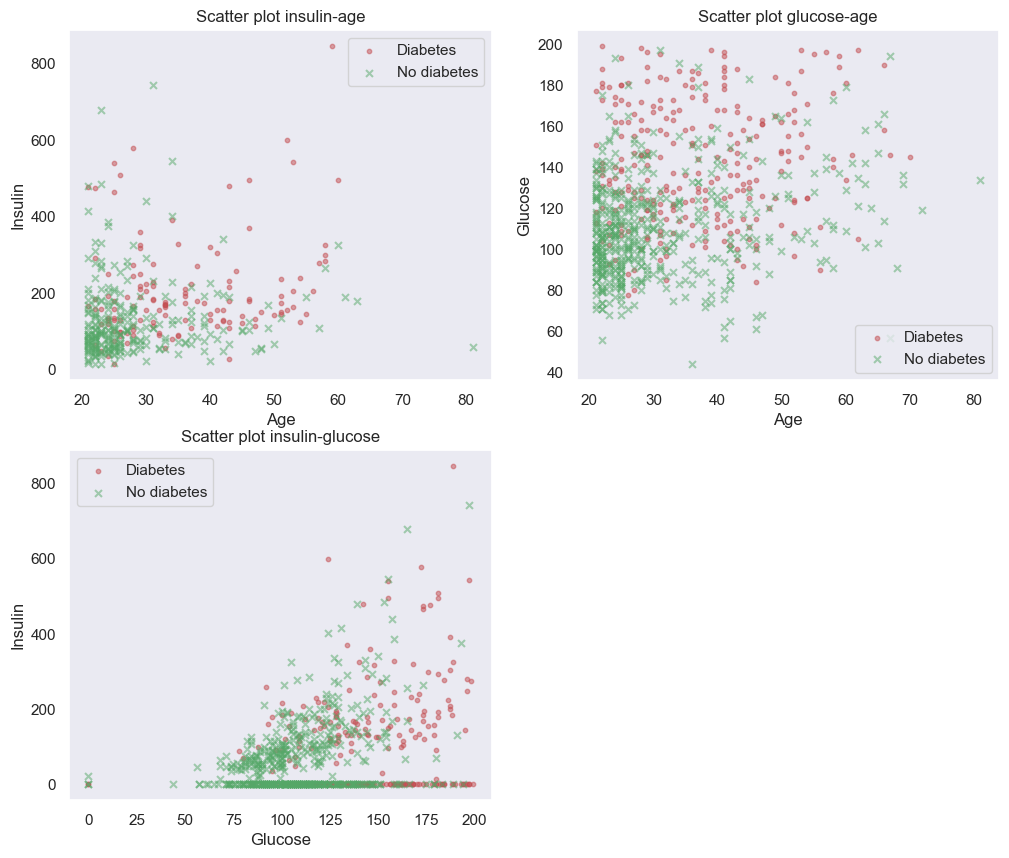

In [38]:
mask_sick = data.Outcome == 1
mask_sick1 = data_insulin.Outcome == 1

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.scatter(data_insulin.loc[mask_sick1,'Age'], data_insulin.loc[mask_sick1,'Insulin'], s=10, alpha=0.5, c='r', label='Diabetes')
plt.scatter(data_insulin.loc[~mask_sick1,'Age'], data_insulin.loc[~mask_sick1,'Insulin'], alpha=0.5, marker='x', s = 25, c='g', label='No diabetes')
plt.xlabel('Age')
plt.ylabel('Insulin')
plt.title('Scatter plot insulin-age')
plt.grid()
plt.legend(loc='best')

mask_sick2 = data_glucose.Outcome == 1
plt.subplot(2,2,2)
plt.scatter(data_glucose.loc[mask_sick2,'Age'], data_glucose.loc[mask_sick2,'Glucose'], s=10, alpha=0.5, c='r', label='Diabetes')
plt.scatter(data_glucose.loc[~mask_sick2,'Age'], data_glucose.loc[~mask_sick2,'Glucose'], alpha=0.5, marker='x', s = 25, c='g', label='No diabetes')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Scatter plot glucose-age')
plt.grid()
plt.legend(loc='best')

plt.subplot(2,2,3)
plt.scatter(data.loc[mask_sick,'Glucose'], data.loc[mask_sick,'Insulin'], s=10, alpha=0.5, c='r', label='Diabetes')
plt.scatter(data.loc[~mask_sick,'Glucose'], data.loc[~mask_sick,'Insulin'], alpha=0.5, marker='x', s = 25, c='g', label='No diabetes')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Scatter plot insulin-glucose')
plt.grid()
plt.legend(loc='best')
plt.show()

##### Zaključci:
Oba grafa pokazuju kako su moja očekivanja bila točna i kako osobe sa višom razinom glukoze i inzulina u krvi češće imaju dijabetes u odnosu na osobe sa manjim razinama, a treći graf pokazuje tendenciju crvenih kružića kako se po grafu krećemo desno i gore (prema višim razinama obiju vrijednosti), što ukazuje na njihovu međusobnu povezanost, tj. koreliranost, no o tome ćemo par grafova niže.

#### d) Box plot grafovi

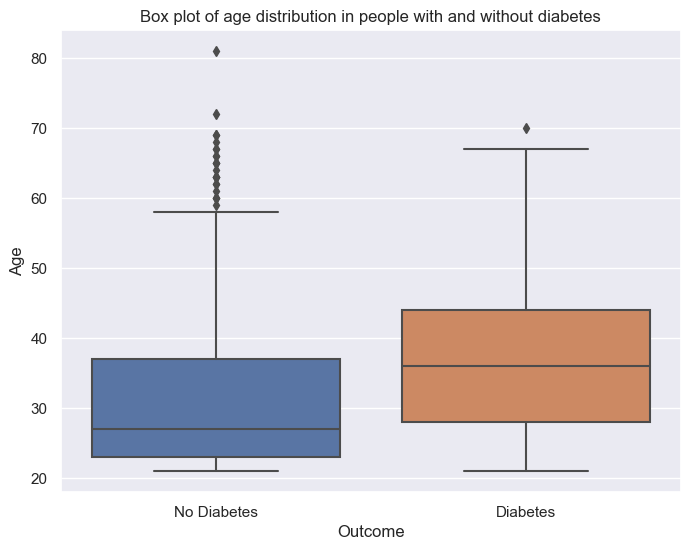

In [24]:
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(x='Outcome', y='Age', data=pd.concat([data_sick, data_healthy]))
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.title('Box plot of age distribution in people with and without diabetes')
plt.show()

#### Zaključak:
Prema ovome grafu dalo bi se zaključiti da su godine faktor kod oboljevanja od dijabetesa jer raspodjela ukazuje kako su oboljeli uglavnom stariji. I to po svim karakteristikama: najmanja vrijednost, prvi i treći kvartil, prosjek, ukratko, sve. Nisam liječnik pa ne znam je li taj zaključak točan, no kao budući data analyst mogu reći da podaci na to ukazuju.

#### e) Korelacijska matrica

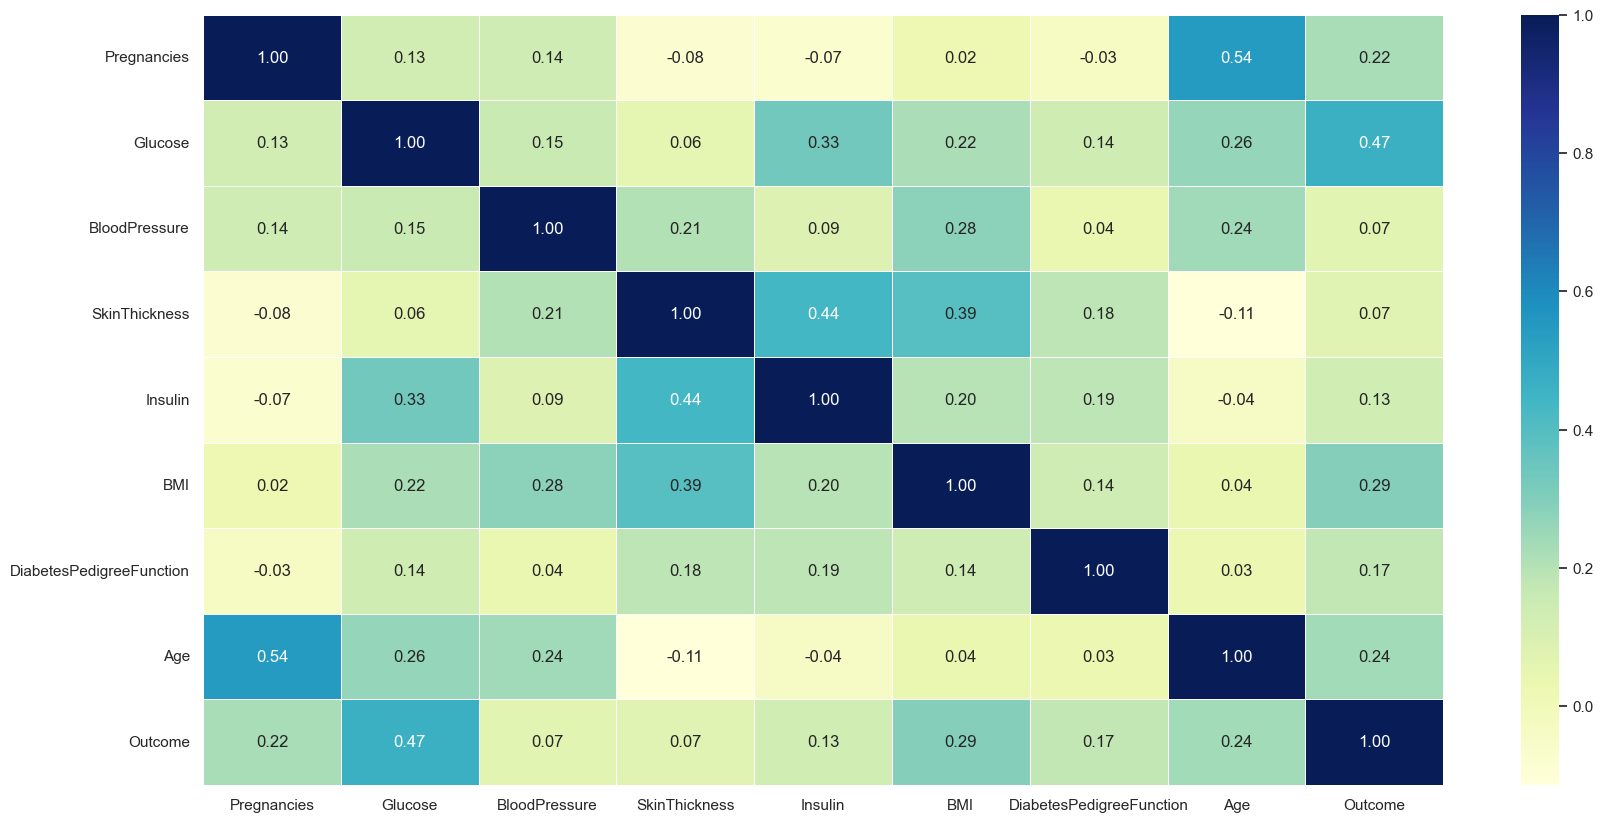

In [25]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.show()

##### Zaključci:
Korelacijska matrica izbacila je mnogo brojeva, a oni govore da na naš Outcome najveći utjecaj imaju redom:
- Glucose
- BMI
- Age
- Pregnancies
- DiabetesPedigreeFunction
- Insulin
- BloodPressure i SkinThickness

Sumnje po pitanju glukoze i BMI su ponovno potvrđene, iako sam iskreno očekivao veću korelaciju sa inzulinom. Godine i broj trudnoća se također pokazuju kao dobri pokazatelji.
Matrica nije pokazala samo to, već još poveznica. Debljina kože može se povezati sa inzulinom, ali i sa BMI (što sam očekivao i veću korelaciju). Povećana tjelesna masa koja uzrokuje veći BMI može se povezati i sa povišenim tlakom, dok osobe sa povećanom količinom glukoze u krvi vjerojatno imaju i povišenu razinu inzulina, i obratno.

#### f) Scatter plot svakog para značajki

C:\Users\Karlo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


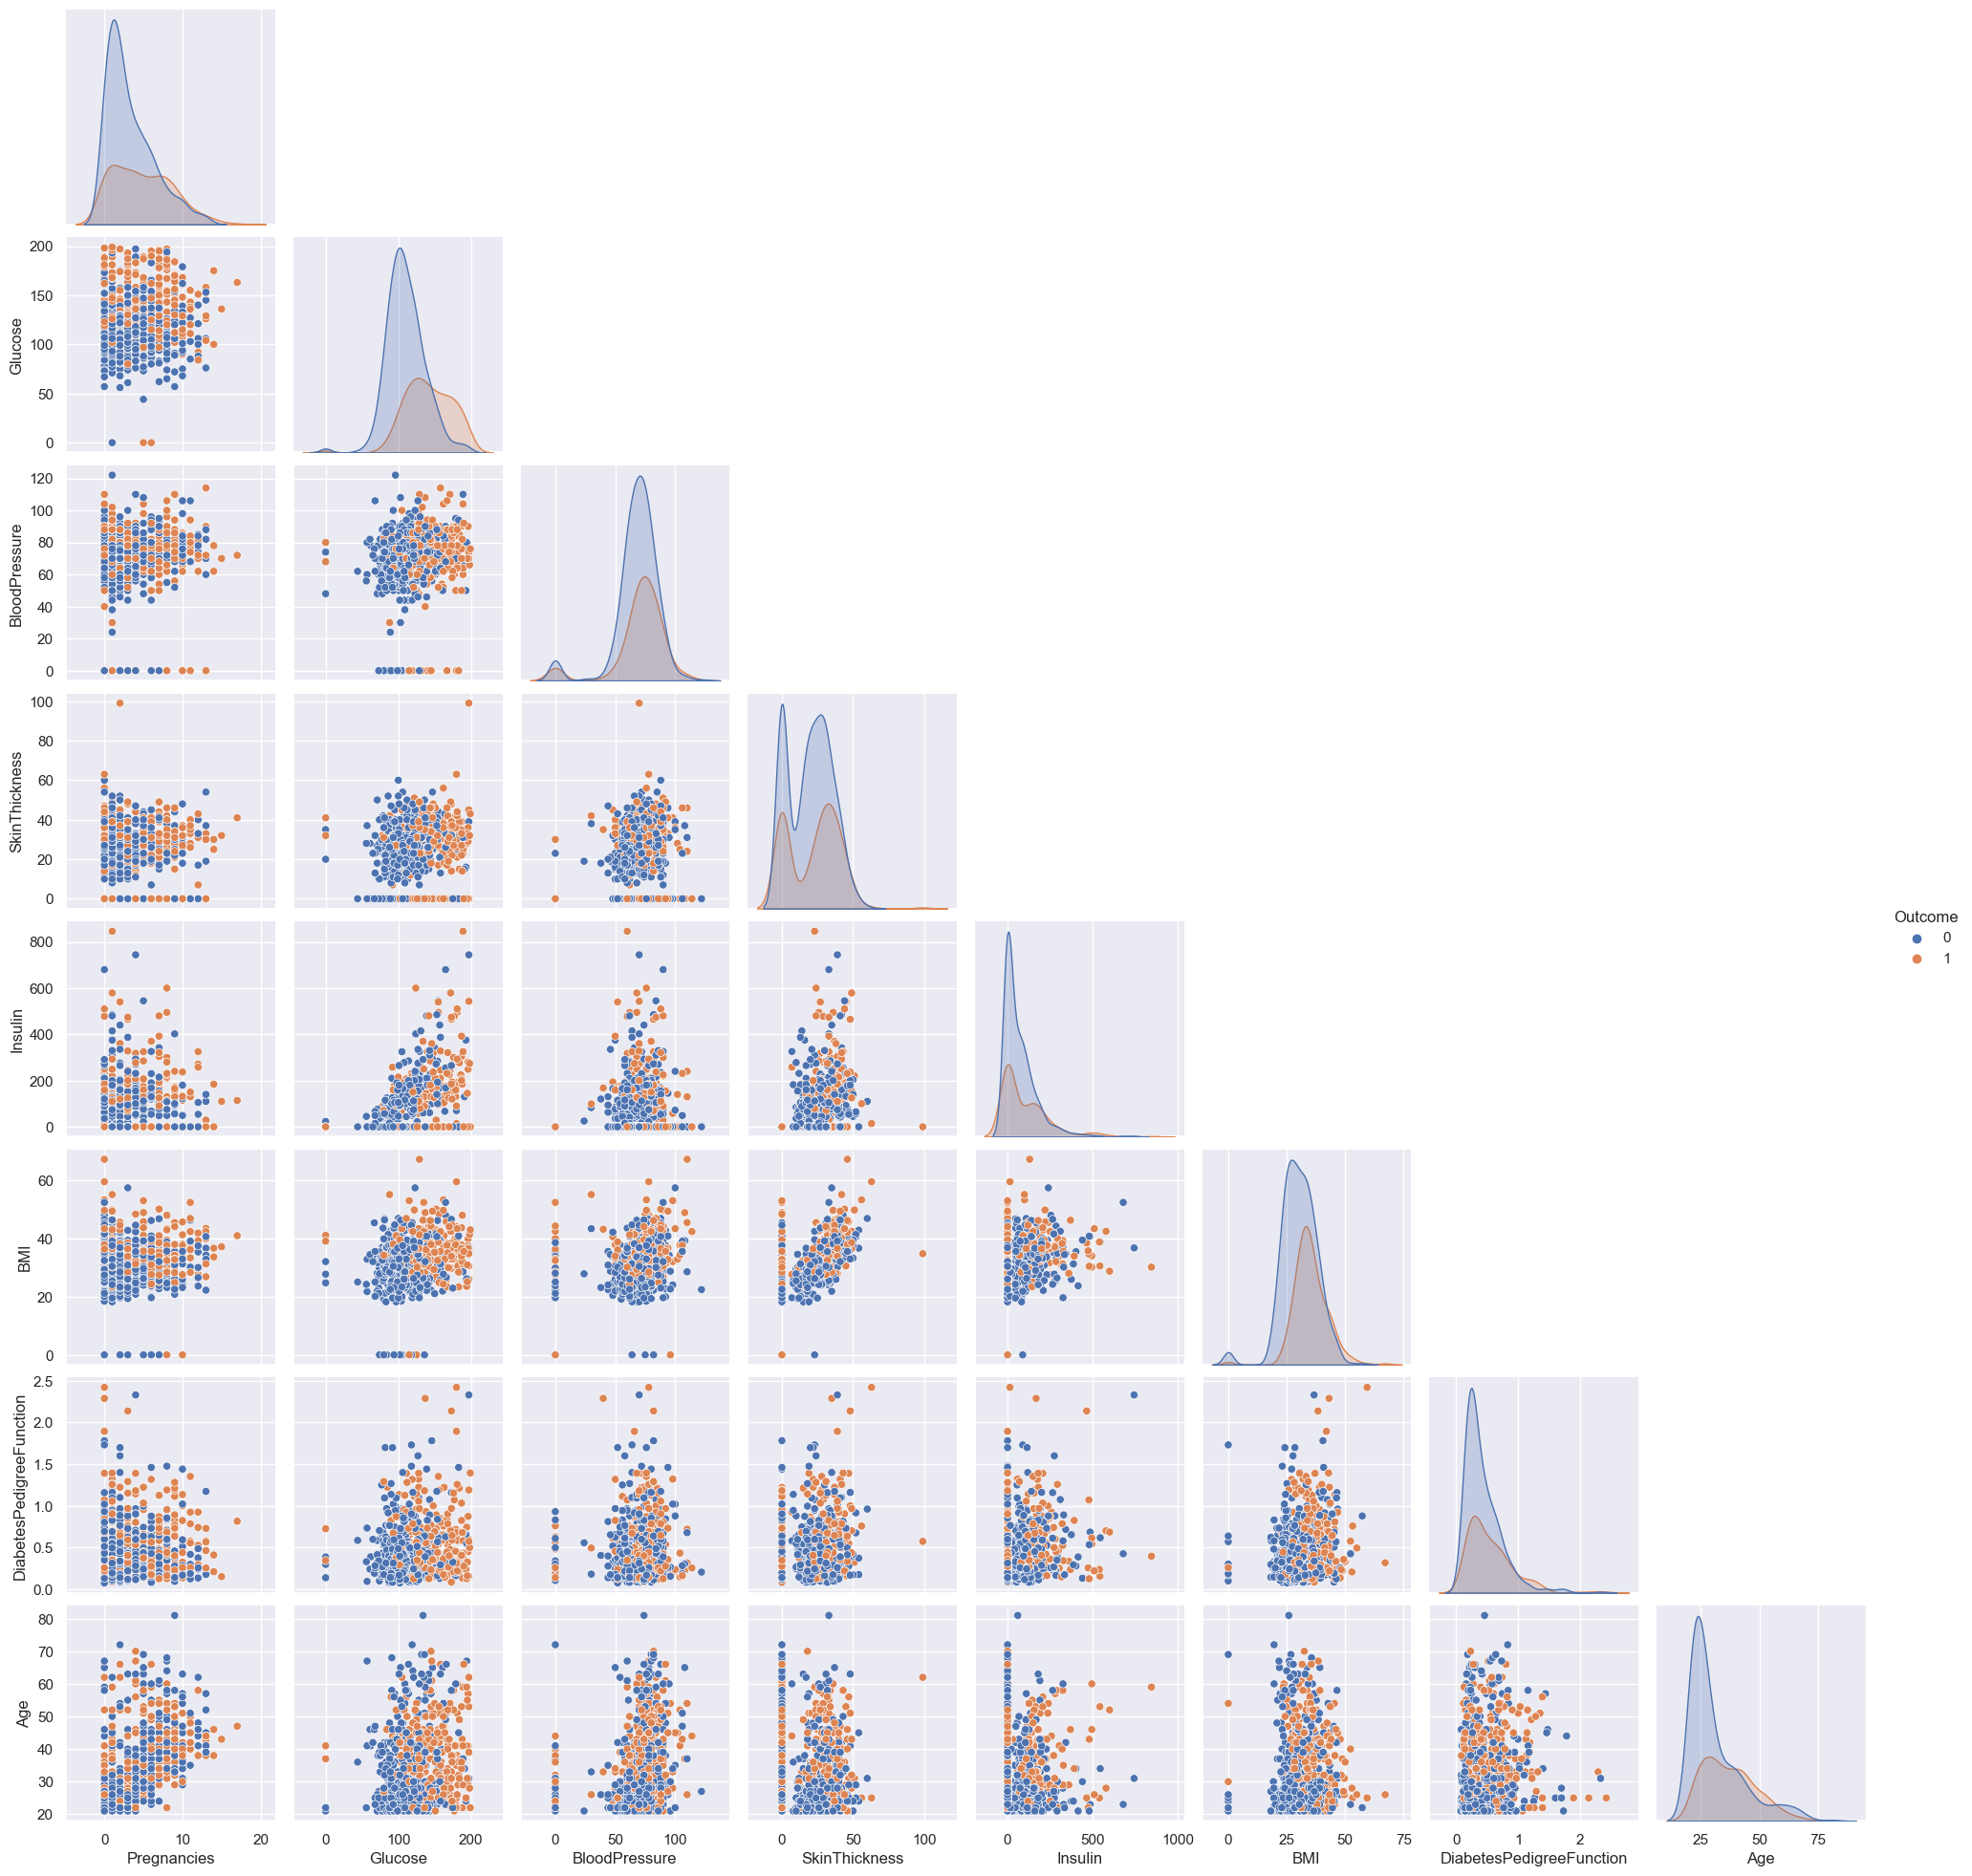

In [37]:
sns.set(rc={'figure.figsize':(25,15)})
sns.pairplot(data, hue="Outcome", corner=True)
plt.show()

##### Zaključci:
Izuzetno mi je zanimljiv graf kod SkinThickness koji ocrtava dvije "grbe" i volio bih i van ovog kolegija istražiti zašto je tome tako. Grafovi samih značajki su jako slični za ljude sa dijabetesom i bez njega, ako se uzme u obzir da podataka oboljelih ima puno manje. Kod količine glukoze u krvi jasno je vidljivo kako graf oboljelih više naginje desno od onoga zdravih ljudi.
Pošto graf prikazuje odnos svakog para značajki, uočio sam kako kod glukoze svugdje narančasti kružići naginju desno u odnosu na plave.
Također, rastom BMI raste i debljina kože što se vidi jer se točkice zajednički kreću gore i desno. Kod izulina i glukoze se također vidi taj rast koji prati neki pravac. Neke veće povezanosti nisam primijetio.

#### f) Violin plotovi

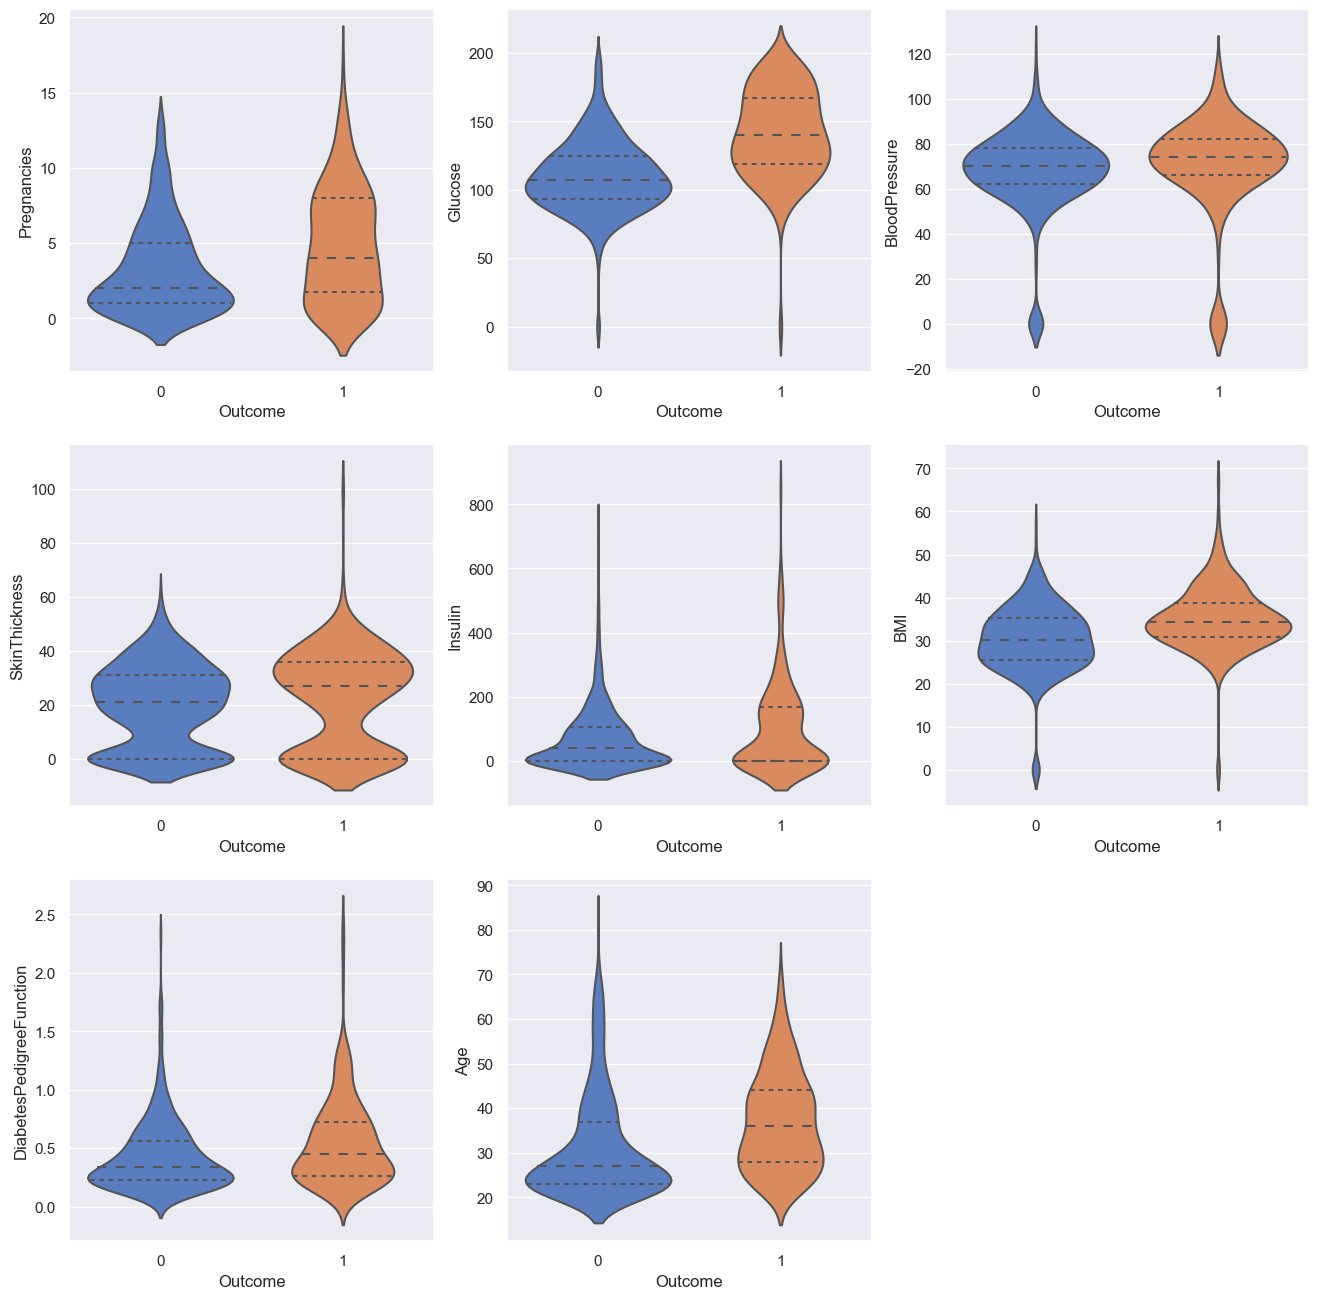

In [26]:
plt.figure(figsize=(16,16))
plt.subplot(3,3,1)
sns.violinplot(x="Outcome", y="Pregnancies", data=data, palette="muted", inner="quartile")
plt.subplot(3,3,2)
sns.violinplot(x="Outcome", y="Glucose", data=data, palette="muted", inner="quartile")
plt.subplot(3,3,3)
sns.violinplot(x="Outcome", y="BloodPressure", data=data, palette="muted", inner="quartile")
plt.subplot(3,3,4)
sns.violinplot(x="Outcome", y="SkinThickness", data=data, palette="muted", inner="quartile")
plt.subplot(3,3,5)
sns.violinplot(x="Outcome", y="Insulin", data=data, palette="muted", inner="quartile")
plt.subplot(3,3,6)
sns.violinplot(x="Outcome", y="BMI", data=data, palette="muted", inner="quartile")
plt.subplot(3,3,7)
sns.violinplot(x="Outcome", y="DiabetesPedigreeFunction", data=data, palette="muted", inner="quartile")
plt.subplot(3,3,8)
sns.violinplot(x="Outcome", y="Age", data=data, palette="muted", inner="quartile")
plt.show()

##### Zaključci:
Iako sam za ovu vrstu grafa saznao tek na ovome kolegiju, vrlo brzo mi je prirastao srcu. Vrlo je jednostavan, a pokazuje puno toga. Što su dvije slikice više simetrične, to nam ukazuje kako ta značajka nema velik utjecaj na dijabetes jer je slična raspodjela neovisno o stanju bolesti. No razliku vidimo u grafovima:
- Pregnancies
- Glucose
- Age

Dok blagu razliku možemo primijetiti i kod:
- DiabetesPedigreeFunction
- BMI